In [1]:
from IPython.display import Image
import numpy as np

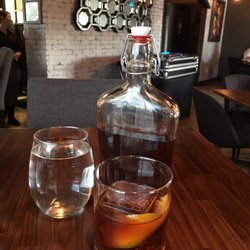

In [2]:
Image(filename='alchohol3.jpg') 

In [3]:
import cv2

In [4]:
img = cv2.imread("alchohol3.jpg")

In [5]:
img.shape

(250, 250, 3)

In [6]:
img = cv2.resize(img,(100,100))

In [7]:
img.shape

(100, 100, 3)

In [8]:
img = img.transpose((2,0,1))

In [9]:
img.shape

(3, 100, 100)

In [10]:
img = img.astype('float32')

In [11]:
img = img/255

In [12]:
import numpy as np

In [13]:
img = np.expand_dims(img,axis=0)

In [14]:
img.shape

(1, 3, 100, 100)

In [15]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),padding='same',input_shape=(3 , 100, 100)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

/Users/ajinkya.parkar@ibm.com/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [17]:
model.load_weights("weights.11-0.72365.hdf5")

In [18]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [19]:
pred = model.predict(img)

In [20]:
pred

array([[ 0.2015743 ,  0.47074479,  0.57633346,  0.51521689,  0.31590924,
         0.7023387 ,  0.71906191,  0.30924773,  0.53667158]], dtype=float32)

In [21]:
y_pred = np.array([1 if pred[0,i]>=0.6 else 0 for i in range(pred.shape[1])])

In [22]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0])

In [23]:

finalOutput = []
for key, value in enumerate(y_pred):
    
    if key == 0 and value == 1:
        finalOutput.append("Good for lunch")
    
    if key == 1 and value == 1:
        finalOutput.append("Good for dinner")
    
    if key == 2 and value == 1:
        finalOutput.append("Takes reservation")
        
    if key == 3 and value == 1:
        finalOutput.append("Outdoor seating")
    if key == 4 and value == 1:
        finalOutput.append("Restaurent is expensive")
    if key == 5 and value == 1:
        finalOutput.append("Has alchohol")
    if key == 6 and value == 1:
        finalOutput.append("Has Table Service")
    if key == 7 and value == 1:
        finalOutput.append("Ambience is classy")
    if key == 8 and value == 1:
        finalOutput.append("Good for kids")
        
    

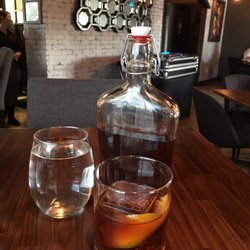

In [24]:
Image(filename='alchohol3.jpg') 

In [25]:
finalOutput

['Has alchohol', 'Has Table Service']